In [2]:
import numpy as np
import math
import cv2 as cv
import matplotlib.pyplot as plt
from PIL import Image


In [3]:

# image = np.array(Image.open('Globe.png').convert("L"))
# h,w = image.shape[:2]
# N = h
# A = 2.0
# B = (N*N)/(2*np.log(200))
# sigma_mat = np.zeros((N,N))

In [4]:
def get_kernel_size(sigma):
    # if isinstance(sigma, np.ndarray):  # Check if sigma is a numpy array (matrix)
    #     k_largest = 0
    #     sigma_with_largest_k = 0
    #     for i in range(len(sigma)):
    #         for j in range(len(sigma)):
    #             k = np.ceil(6 * sigma[i,j])+1
    #             if k > k_largest:
    #                 k_largest = k 
    #                 sigma_with_largest_k = sigma[i,j]
    #     return sigma_with_largest_k , k_largest.astype(int)              

    # else:  # If sigma is a single value
        k = np.ceil(6 * sigma)
        return int(k)

In [5]:
def pad(k , image):
 h,w = image.shape[:2]
 output_image = np.zeros((h, w), dtype=np.float32)
 output_image = np.pad(image,(int(( k - 1 )/2), int(( k - 1 )/2)), 'constant')
#  print(output_image.shape)
 plt.imshow(output_image,'gray')
 hp , wp = output_image.shape
 return output_image


In [6]:
def make_kernel(k , sigma):
    kernel = np.zeros((k,k) , np.float32)
    if k == 1:
        return np.ones((k,k))
    for x in range(k):
        for y in range(k):
            normal = 1 / ( 2 * np.pi * sigma**2 )
            exp_term = np.exp(-( x**2 + y**2 ) / (2 * sigma**2))
            kernel [x,y] = normal*exp_term
    kernel = kernel/np.sum(kernel)
    
    return kernel

In [7]:
# def make_sigma_matrix(image):
#  h,w = image.shape[:2]
#  N = h
#  A = 2.0
#  B = (N*N)/(2*np.log(200))
#  sigma_mat = np.zeros((N,N))
#  for m in range(N):
#    for n in range(N):
#     exp_term = np.exp(-((m - (N/2))**2 + (n - (N/2))**2) / B )
#     sigma = A*exp_term 
#     sigma_mat[m,n] = sigma
#  print(type(sigma_mat))
#  return sigma_mat
 

In [8]:
def space_invariant(sigma , image):
 h,w = image.shape[:2]
 temp_out = np.zeros((h,w))
 k = np.ceil(6*sigma)+1
 k_mid = k//2
 if (sigma!=0):
  gaussian_filter = make_kernel(k,sigma)
  output_image = pad(sigma , image)
  for x in range(k_mid , h + k_mid):
   for y in range(k_mid , w + k_mid):
    op = 0
    for i in range(k):
     for j in range(k):
      op+= gaussian_filter[i,j]*output_image[x-k_mid+i , y - k_mid+j]
    temp_out[x-k_mid , y - k_mid] = op
 else :
  temp_out = image
 return temp_out

In [9]:
# def space_variant(sigma_matrix, image):
#  h,w = image.shape[:2]
#  k_largest = 0
#  for i in range(len(sigma_matrix)):
#   for j in range(len(sigma_matrix)):
#     k = np.ceil(6 * sigma_matrix[i,j])+1
#     k = k.astype(int)
#     if k > k_largest:
#      k_largest = k 
#      sigma_with_largest_k = sigma_matrix[i,j]
#  k_mid = k_largest//2
#  output_image = pad(sigma_with_largest_k, image)
#  h_out , w_out = output_image.shape[:2]
#  temp_out = np.zeros((h_out , w_out))
#  for i in range(k_mid , h+k_mid):
#   for j in range (k_mid , w+k_mid):
#    sigma = sigma_matrix[i-k_mid,j-k_mid]
#    l = get_kernel_size(sigma)
#    l_mid = l//2
#    img_intensity = image[i-k_mid,j-k_mid]
#    kernel = make_kernel(l,sigma)
#    temp_out[i -l: i+l+1 , j-l:j+l+1] += img_intensity*kernel

#  return temp_out


 
 

In [10]:
"""def space_variant(image):
    h, w = image.shape[:2]
    N = h
    A = 2.0
    # B = (N*N)/(2*np.log(200))
    B = (N*N)/4.602
    sigma_matrix = np.zeros((N,N))
    for m in range(N):
     for n in range(N):
      exp_term = np.exp(-((m - (N/2))**2 + (n - (N/2))**2) / B )
      sigma = A*exp_term 
      sigma_matrix[m,n] = sigma
    print(sigma_matrix)
    # print(h,w)
    k_largest = 0
    for i in range(N):
        for j in range(N):
            k = np.ceil(6 * sigma_matrix[i, j]) + 1
            k = k.astype(int)
            if k > k_largest:
                k_largest = k
                sigma_with_largest_k = sigma_matrix[i, j]
    k_mid = k_largest // 2
    output_image = pad(sigma_with_largest_k, image)
    h_out , w_out = output_image.shape[:2]

    temp_out = np.zeros((h, w))
    print(temp_out.shape)
    for i in range(k_mid, h + k_mid):
        for j in range(k_mid, w + k_mid):
            sigma = sigma_matrix[i - k_mid, j - k_mid]  # Adjust index to access sigma_matrix correctly
            print("sigma:",sigma)
            intensity = image[i - k_mid, j - k_mid]
            k_ = int(np.ceil(6*sigma)+1)
            # k_ = get_kernel_size(sigma)
            k__mid = k_//2
            kernel = make_kernel(k_, sigma)
            print("k:",k_)
            print("kmid",k__mid)
            temp_out[i- k__mid : i+ k__mid+1 , j- k__mid : j+ k__mid+1 ] = intensity*kernel
            print(temp_out.shape)
    return temp_out
"""

'def space_variant(image):\n    h, w = image.shape[:2]\n    N = h\n    A = 2.0\n    # B = (N*N)/(2*np.log(200))\n    B = (N*N)/4.602\n    sigma_matrix = np.zeros((N,N))\n    for m in range(N):\n     for n in range(N):\n      exp_term = np.exp(-((m - (N/2))**2 + (n - (N/2))**2) / B )\n      sigma = A*exp_term \n      sigma_matrix[m,n] = sigma\n    print(sigma_matrix)\n    # print(h,w)\n    k_largest = 0\n    for i in range(N):\n        for j in range(N):\n            k = np.ceil(6 * sigma_matrix[i, j]) + 1\n            k = k.astype(int)\n            if k > k_largest:\n                k_largest = k\n                sigma_with_largest_k = sigma_matrix[i, j]\n    k_mid = k_largest // 2\n    output_image = pad(sigma_with_largest_k, image)\n    h_out , w_out = output_image.shape[:2]\n\n    temp_out = np.zeros((h, w))\n    print(temp_out.shape)\n    for i in range(k_mid, h + k_mid):\n        for j in range(k_mid, w + k_mid):\n            sigma = sigma_matrix[i - k_mid, j - k_mid]  # Adjust in

In [13]:
import numpy as np

def space_variant(image):
    h, w = image.shape[:2]
    N = h
    A = 2.0
    temp_out = np.zeros((h, w))
    B = (N**2)/(2*np.log(200))
    # B = (N*N)/4.602
    sigma_matrix = np.zeros((N,N))
    for m in range(N):
        for n in range(N):
            exp_term = np.exp(-((m - (N/2))**2 + (n - (N/2))**2) / B )
            sigma = A * exp_term 
            sigma_matrix[m, n] = sigma
    print(sigma_matrix)
    # print(h, w)
    k_largest = 0
    for i in range(N):
        for j in range(N):
            k = np.ceil(6 * sigma_matrix[i, j]) + 1
            k = k.astype(int)
            if k > k_largest:
                k_largest = k
                sigma_with_largest_k = sigma_matrix[i, j]
    k_mid = k_largest // 2
    output_image = pad(sigma_with_largest_k, image)
    h_out, w_out = output_image.shape[:2]
    for x in range(k_mid, h + k_mid):
        for y in range(k_mid, w + k_mid):
            op = 0
            sigma = sigma_matrix[x - k_mid, y - k_mid]  # Adjust index to access sigma_matrix correctly
            print("sigma:", sigma)
            intensity = image[x - k_mid, y - k_mid]
            k_ = int(np.ceil(6 * sigma) + 1)
            # k_ = get_kernel_size(sigma)
            k__mid = k_ // 2
            kernel = make_kernel(k_, sigma)
            print("k:", k_)
            print("kmid", k__mid)
            for i in range(k_):
                for j in range(k_):
                    op += kernel[i, j] * output_image[x - k_mid + i, y - k_mid + j]
    temp_out[x - k_mid, y - k_mid] = op
    return temp_out


[[0.01       0.01055551 0.01113567 ... 0.01174118 0.01113567 0.01055551]
 [0.01055551 0.01114188 0.01175427 ... 0.01239341 0.01175427 0.01114188]
 [0.01113567 0.01175427 0.01240032 ... 0.01307459 0.01240032 0.01175427]
 ...
 [0.01174118 0.01239341 0.01307459 ... 0.01378553 0.01307459 0.01239341]
 [0.01113567 0.01175427 0.01240032 ... 0.01307459 0.01240032 0.01175427]
 [0.01055551 0.01114188 0.01175427 ... 0.01239341 0.01175427 0.01114188]]
sigma: 0.010000000000000004
k: 2
kmid 1
sigma: 0.010555511431737332
k: 2
kmid 1
sigma: 0.01113567395030338
k: 2
kmid 1
sigma: 0.011741178157631853
k: 2
kmid 1
sigma: 0.012372708898506732
k: 2
kmid 1
sigma: 0.013030943380299694
k: 2
kmid 1
sigma: 0.01371654921288753
k: 2
kmid 1
sigma: 0.014430182371182465
k: 2
kmid 1
sigma: 0.015172485083148671
k: 2
kmid 1
sigma: 0.01594408364662802
k: 2
kmid 1
sigma: 0.016745586178756825
k: 2
kmid 1
sigma: 0.017577580302220414
k: 2
kmid 1
sigma: 0.018440630773061958
k: 2
kmid 1
sigma: 0.019335277055234166
k: 2
kmid 1

IndexError: index 195 is out of bounds for axis 1 with size 195

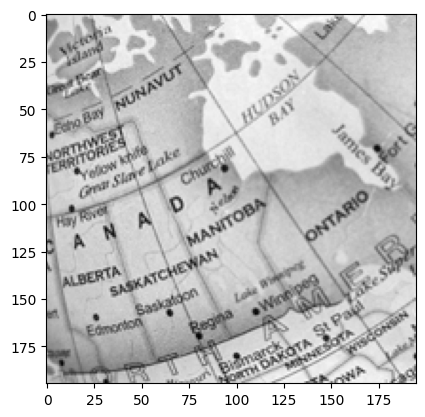

In [14]:

image1 = np.array(Image.open('Globe.png').convert("L"))
svblur_img = space_variant(image1)